# Project: Beta Bank 

## Table of Contents

* [Project description](#Project_description)
* [Description of the data](#data)
* [Open the data file](#open)
    * [get_dummies for Gender feature](#get_dummies)
    * [Label Encoding](#Label_Encoding)
* [EDA](#EDA)
* [Split the source data ](#split)
* [Feature Scaling](#Scaling)
* [Check the quality of the model using the test set](#test)
* [Examine the balance of classes. Train the model without taking into account the imbalance](#Train_no_balance)
* [Improve the quality of the model](#Improve_the_quality)
    * [Upsampling](#Upsampling)
    * [Downsampeling](#Downsampeling)
* [Test](#test)
* [Conclusion](#conclusion)

## Project description <a class="anchor" id="Project_description"></a>


Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

**We need to predict whether a customer will leave the bank soon.**

 You have the data on clients’ past behavior and termination of contracts with the bank.
 
Build a model with the maximum possible F1 score. To pass the project, **you need an F1 score of at least 0.59.** Check the F1 for the test set.

**Additionally, measure the AUC-ROC metric and compare it with the F1.**

## Data description <a class="anchor" id="data"></a>

**Features**
* RowNumber — data string index
* CustomerId — unique customer identifier
* Surname — surname
* CreditScore — credit score
* Geography — country of residence
* Gender — gender
* Age — age
* Tenure — period of maturation for a customer’s fixed deposit (years)
* Balance — account balance
* NumOfProducts — number of banking products used by the customer
* HasCrCard — customer has a credit card
* IsActiveMember — customer’s activeness
* EstimatedSalary — estimated salary
 
**Target**
* Exited — сustomer has left

## Download and prepare the data  <a class="anchor" id="open"></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
 try:
    data = pd.read_csv('Churn.csv')    
except:
    print("Something went wrong when opening the file")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
Tenure,909,0.09
RowNumber,0,0.00
CustomerId,0,0.00
Surname,0,0.00
CreditScore,0,0.00
Geography,0,0.00
Gender,0,0.00
Age,0,0.00
Balance,0,0.00
NumOfProducts,0,0.00


<div style="border:solid black 2px; padding: 20px"> <b>Note:</b><br>
909 missing values for ''Tenure''

In [6]:
print("duplicates number: {}".format(data.duplicated().sum()))

duplicates number: 0


In [7]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [8]:
data[data['Tenure'].isna()].sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
576,577,15761986,Obialo,439,Spain,Female,32,NaN,138901.61,1,1,0,75685.97,0
3250,3251,15587419,Shipton,611,France,Male,58,NaN,0.00,2,0,1,107665.68,1
2927,2928,15669656,Macdonald,632,France,Male,32,NaN,111589.33,1,1,1,170382.99,0
8991,8992,15698902,McIntyre,547,Germany,Female,42,NaN,142703.40,1,1,0,86207.49,1
6783,6784,15651955,Hanson,603,France,Male,31,NaN,0.00,2,0,1,9607.10,0


In [9]:
data[data['Tenure']==0].sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2264,2265,15812945,Padovesi,582,France,Female,29,0.0,0.00,1,1,1,84012.81,0
2003,2004,15799350,Mao,632,France,Male,41,0.0,106134.46,1,0,1,105570.39,0
7951,7952,15644699,Crawford,850,France,Female,40,0.0,0.00,2,1,0,1099.95,0
8390,8391,15755521,Ma,660,France,Female,48,0.0,90044.32,2,0,1,187604.97,1
7845,7846,15622774,Kao,648,France,Male,34,0.0,0.00,1,1,1,167931.81,0


In [10]:
features_l =[]
for feature in data.columns:
    if feature != "Tenure":
        features_l.append(feature)

In [11]:
features_l

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [12]:
x_feature='Tenure'
y_features = features_l

No handles with labels found to put in legend.


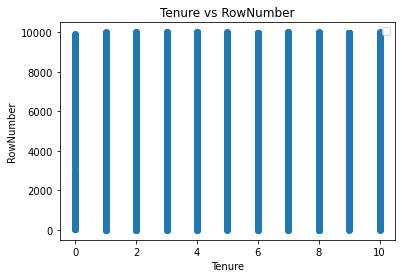

No handles with labels found to put in legend.


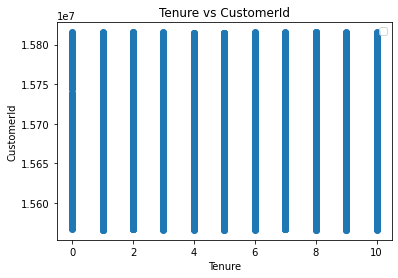

No handles with labels found to put in legend.


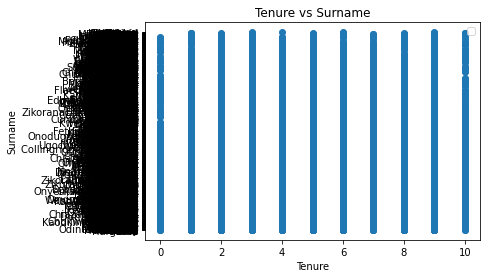

No handles with labels found to put in legend.


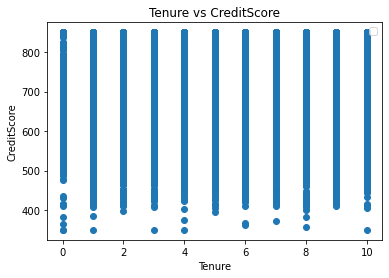

No handles with labels found to put in legend.


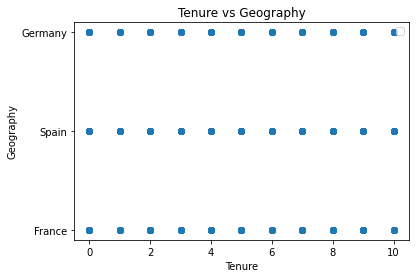

No handles with labels found to put in legend.


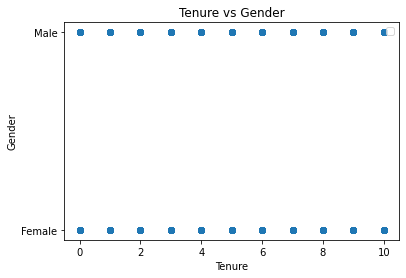

No handles with labels found to put in legend.


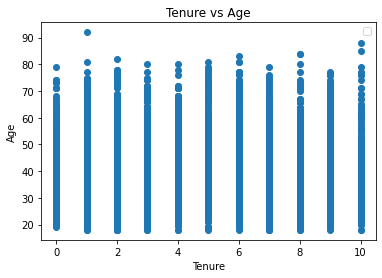

No handles with labels found to put in legend.


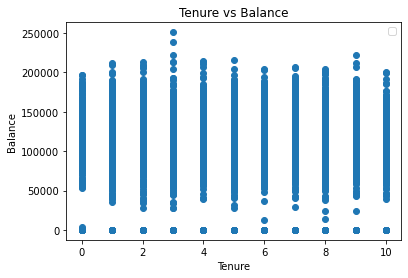

No handles with labels found to put in legend.


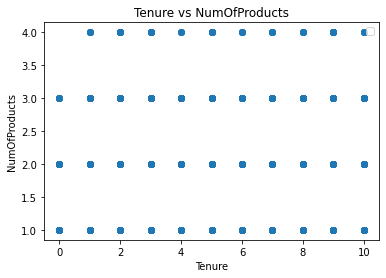

No handles with labels found to put in legend.


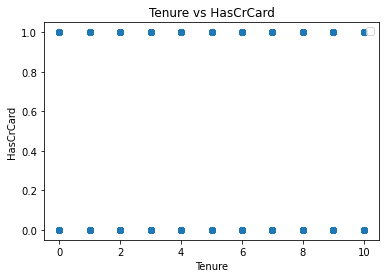

No handles with labels found to put in legend.


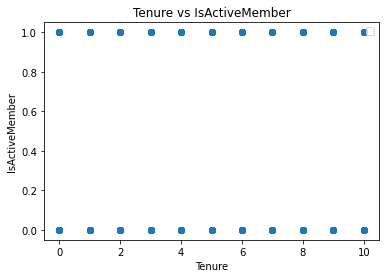

No handles with labels found to put in legend.


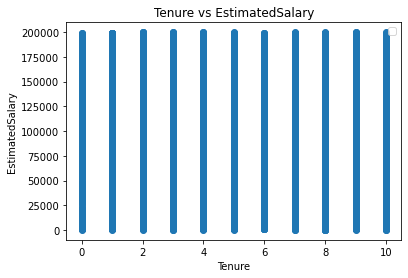

No handles with labels found to put in legend.


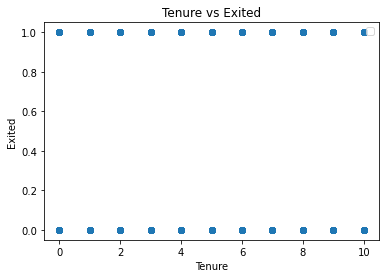

In [13]:
#plotting scatter plot for Tenure against other features  
for y_feature in y_features:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(data[x_feature], data[y_feature])
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.set_title("{} vs {}".format(x_feature, y_feature))

    plt.legend()
    plt.show()

No handles with labels found to put in legend.


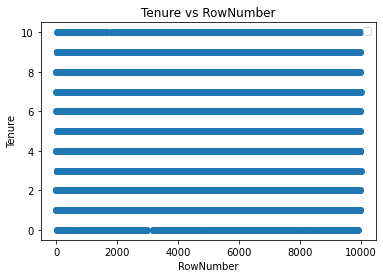

No handles with labels found to put in legend.


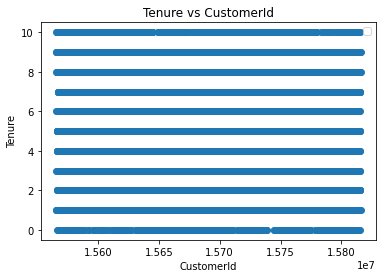

No handles with labels found to put in legend.


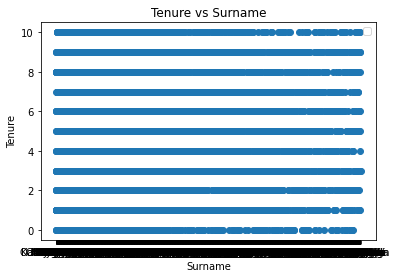

No handles with labels found to put in legend.


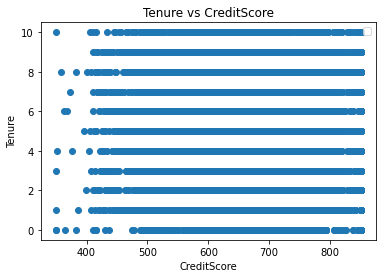

No handles with labels found to put in legend.


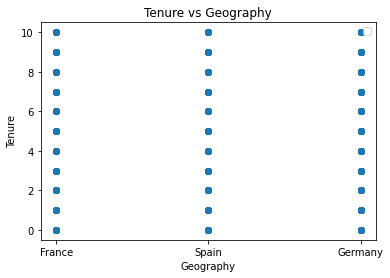

No handles with labels found to put in legend.


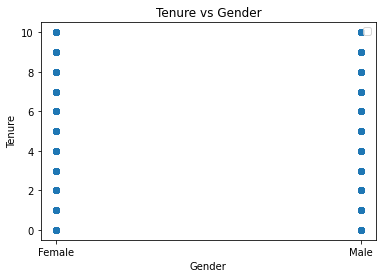

No handles with labels found to put in legend.


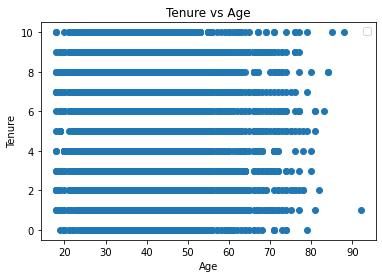

No handles with labels found to put in legend.


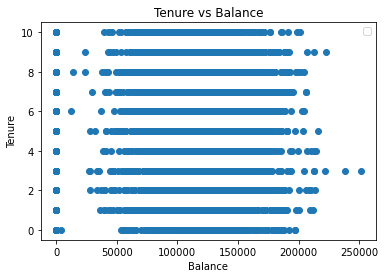

No handles with labels found to put in legend.


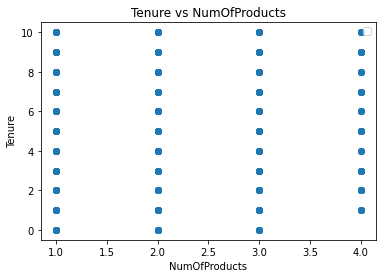

No handles with labels found to put in legend.


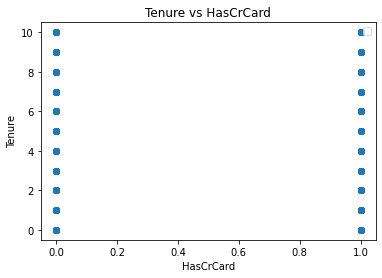

No handles with labels found to put in legend.


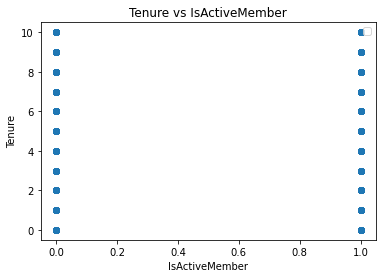

No handles with labels found to put in legend.


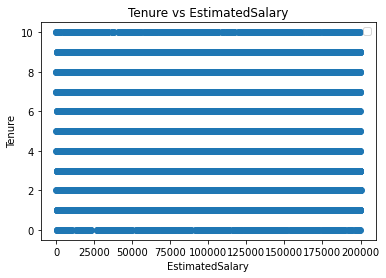

No handles with labels found to put in legend.


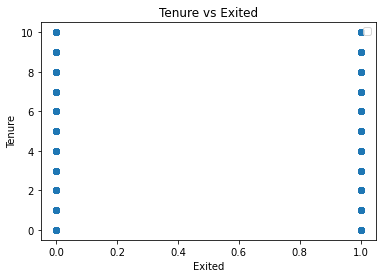

In [14]:
#plotting scatter plot for Tenure against other features  
for y_feature in y_features:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(data[y_feature], data[x_feature])
    ax.set_xlabel(y_feature)
    ax.set_ylabel(x_feature)
    ax.set_title("{} vs {}".format(x_feature, y_feature))

    plt.legend()
    plt.show()

In [15]:
data.Tenure.max()

10.0

In [16]:
data.Tenure.min()

0.0

<div style="border:solid black 2px; padding: 20px"> <b>Note:</b><br>
The ''Tenure'' feature has na values that are not from 0 (min) to 10 (max). i tried to find a correlation to any feature that I might use a fiilna method but couldn't find any.
Therefore I will drop those missing values, and they are less than 10% from the data.

In [17]:
data_ = data.dropna()

In [18]:
report = data_.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data_.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
RowNumber,0,0.0
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


In [19]:
print(data_.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [20]:
data_.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


#### get_dummies for Gender feature<a class="anchor" id="get_dummies"></a>

In [21]:
#get dummies only for Gender because it is a binary feature, Fenmale=0, male =1
Gender = pd.get_dummies(data_.Gender,drop_first=True)
print(Gender.head(5))

   Male
0     0
1     0
2     0
3     0
4     0


In [22]:
data_ohe = data_.drop('Gender', axis=1)
data_ohe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,43,2.0,125510.82,1,1,1,79084.10,0


In [23]:
data_ohe['Gender'] = Gender
data_ohe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender
0,1,15634602,Hargrave,619,France,42,2.0,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,41,1.0,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,42,8.0,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,39,1.0,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,43,2.0,125510.82,1,1,1,79084.10,0,0


In [24]:
data_ohe[data_ohe['Gender'] ==1]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender
5,6,15574012,Chu,645,Spain,44,8.0,113755.78,2,1,0,149756.71,1,1
6,7,15592531,Bartlett,822,France,50,7.0,0.00,2,1,1,10062.80,0,1
8,9,15792365,He,501,France,44,4.0,142051.07,2,0,1,74940.50,0,1
9,10,15592389,H?,684,France,27,2.0,134603.88,1,1,1,71725.73,0,1
10,11,15767821,Bearce,528,France,31,6.0,102016.72,2,0,0,80181.12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9993,15657105,Chukwualuka,726,Spain,36,2.0,0.00,1,1,0,195192.40,0,1
9993,9994,15569266,Rahman,644,France,28,7.0,155060.41,1,1,0,29179.52,0,1
9995,9996,15606229,Obijiaku,771,France,39,5.0,0.00,2,1,0,96270.64,0,1
9996,9997,15569892,Johnstone,516,France,35,10.0,57369.61,1,1,1,101699.77,0,1


In [25]:
data_ohe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender
0,1,15634602,Hargrave,619,France,42,2.0,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,41,1.0,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,42,8.0,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,39,1.0,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,43,2.0,125510.82,1,1,1,79084.10,0,0


In [26]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Age              9091 non-null   int64  
 6   Tenure           9091 non-null   float64
 7   Balance          9091 non-null   float64
 8   NumOfProducts    9091 non-null   int64  
 9   HasCrCard        9091 non-null   int64  
 10  IsActiveMember   9091 non-null   int64  
 11  EstimatedSalary  9091 non-null   float64
 12  Exited           9091 non-null   int64  
 13  Gender           9091 non-null   uint8  
dtypes: float64(3), int64(8), object(2), uint8(1)
memory usage: 1003.2+ KB


In [27]:
#get dummies only for Gender because it is a binary feature, Fenmale=0, male =1
Geography = pd.get_dummies(data_.Geography)
print(Geography.head(5))

   France  Germany  Spain
0       1        0      0
1       0        0      1
2       1        0      0
3       1        0      0
4       0        0      1


In [28]:
data_ohe_2 = data_ohe.drop('Geography', axis=1)
data_ohe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender
0,1,15634602,Hargrave,619,France,42,2.0,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,41,1.0,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,42,8.0,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,39,1.0,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,43,2.0,125510.82,1,1,1,79084.10,0,0


In [29]:
Geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9994,1,0,0
9995,1,0,0
9996,1,0,0
9997,1,0,0


In [30]:
data_ohe_2['France'] = Geography['France']
data_ohe_2['Germany'] = Geography['Germany']
data_ohe_2['Spain'] = Geography['Spain']

In [31]:
data_ohe_2.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender,France,Germany,Spain
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,0,1,0,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,0,1
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,0,1,0,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,0,1,0,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,0,1


In [32]:
#RowNumber,Surname,CustomerId features do not contribute to the model
df = data_ohe_2.drop(['RowNumber','Surname','CustomerId'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Age              9091 non-null   int64  
 2   Tenure           9091 non-null   float64
 3   Balance          9091 non-null   float64
 4   NumOfProducts    9091 non-null   int64  
 5   HasCrCard        9091 non-null   int64  
 6   IsActiveMember   9091 non-null   int64  
 7   EstimatedSalary  9091 non-null   float64
 8   Exited           9091 non-null   int64  
 9   Gender           9091 non-null   uint8  
 10  France           9091 non-null   uint8  
 11  Germany          9091 non-null   uint8  
 12  Spain            9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(4)
memory usage: 745.7 KB


## EDA  <a class="anchor" id="EDA"></a>

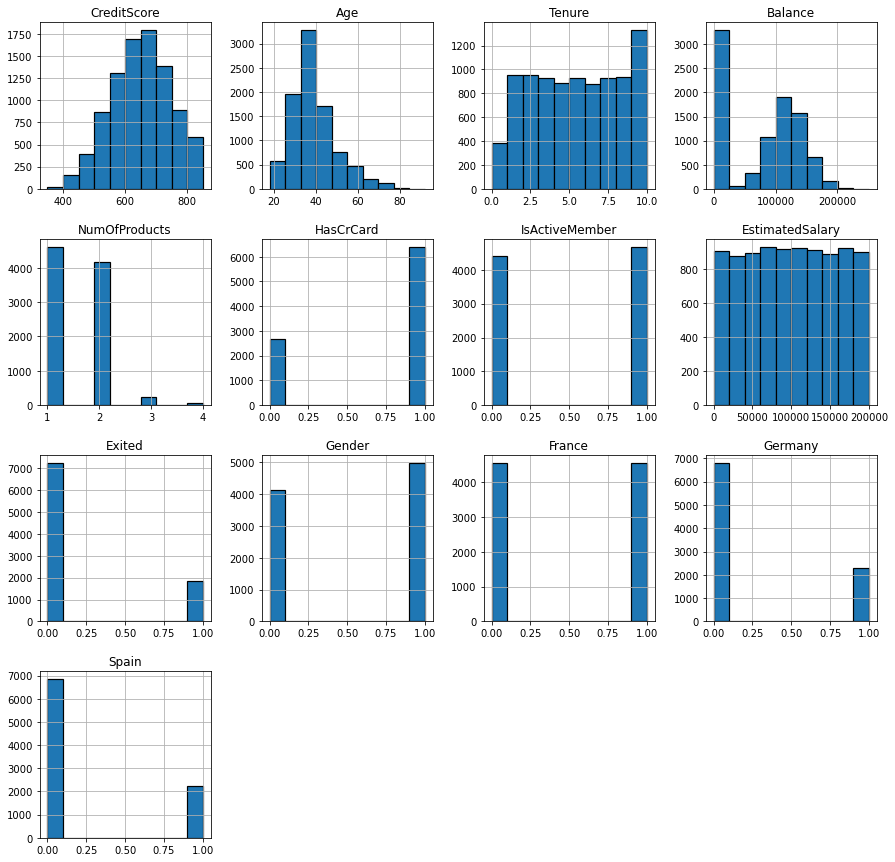

In [33]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(15,15));

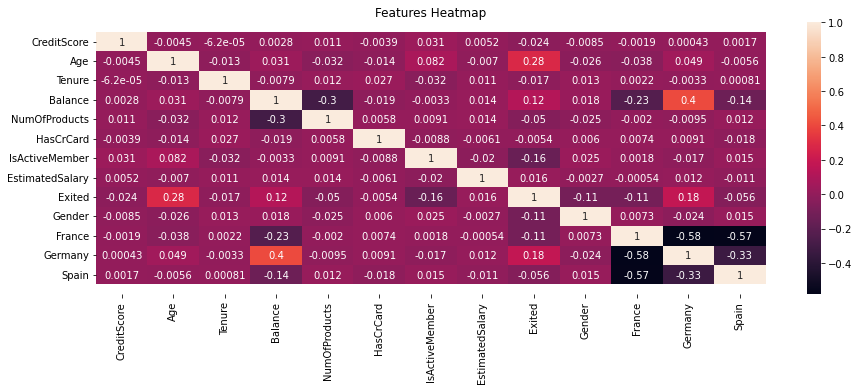

In [34]:
plt.figure(figsize=(15,5))
ax = sns.heatmap(df.corr(), annot=True, cmap='rocket')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.yticks(rotation=0);
plt.title('Features Heatmap')
plt.show()

<div style="border:solid black 2px; padding: 20px"> <b>Note:</b><br>
seems like ''Age'' feature and ''Exited''  are correlated, with the highest correlation, but it is a weak positive correlation. After that, the balance correlates with ''Exited'', but it is a weak positive correlation. all other features have no too weak positive or negative correlation.

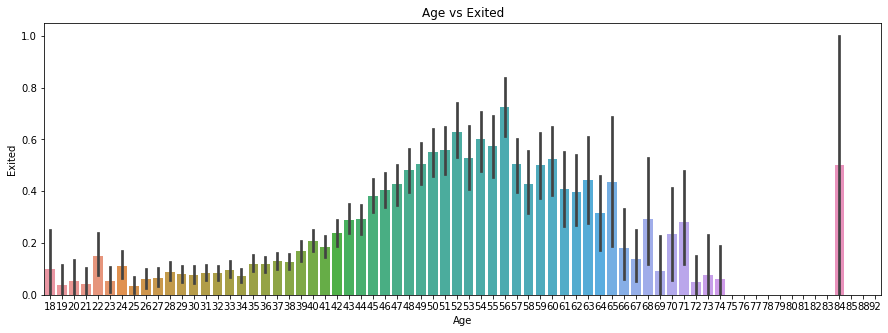

In [35]:
fig = plt.figure(figsize=(15,5))
ax = plt.axes()
plt.title('Age vs Exited')
sns.barplot(data=df, x="Age", y="Exited")
plt.show()

<div style="border:solid black 2px; padding: 20px"> <b>Note:</b><br>

Life expectancy:

France 82.58

Spain 83.49

Germany 80.94 

It might be that Age = 84 has high vaule for Exited due to Life expectancy

In [36]:
#droping data where is age is 84 and higher
df1= df.query('Age <84')

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9086 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9086 non-null   int64  
 1   Age              9086 non-null   int64  
 2   Tenure           9086 non-null   float64
 3   Balance          9086 non-null   float64
 4   NumOfProducts    9086 non-null   int64  
 5   HasCrCard        9086 non-null   int64  
 6   IsActiveMember   9086 non-null   int64  
 7   EstimatedSalary  9086 non-null   float64
 8   Exited           9086 non-null   int64  
 9   Gender           9086 non-null   uint8  
 10  France           9086 non-null   uint8  
 11  Germany          9086 non-null   uint8  
 12  Spain            9086 non-null   uint8  
dtypes: float64(3), int64(6), uint8(4)
memory usage: 745.3 KB


In [38]:
df1.shape

(9086, 13)

### Split the data into two sets <a class="anchor" id="split"></a>

<div style="border:solid black 2px; padding: 20px"><br>
Test set doesn't exist. In that case, the source data has to be split into three parts: training, validation, and test. The sizes of validation set and test set are usually equal. It gives us source data split in a 3:1:1 ratio.

In [39]:
df_train, df_test = train_test_split(df1, test_size=0.20, random_state=12345)
df_train_2, df_valid = train_test_split(df_train, test_size=0.25, random_state=12345)

In [40]:
features_train = df_train_2.drop('Exited',axis=1)
features_valid = df_valid.drop('Exited',axis=1)
features_test = df_test.drop('Exited',axis=1)


In [41]:
print("features_train:",features_train.shape)
print("features_valid:",features_valid.shape)
print("features_test:",features_test.shape)

features_train: (5451, 12)
features_valid: (1817, 12)
features_test: (1818, 12)


In [42]:
target_train = df_train_2['Exited']
target_valid = df_valid['Exited']
target_test = df_test['Exited']

### Feature Scaling <a class="anchor" id="Scaling"></a>

<div style="border:solid black 2px; padding: 20px"><br>
The features have different scale, therefor they nee dto be standardize

In [43]:
#using the StandardScaler method from sklearn
scaler = StandardScaler()

In [44]:
scaler.fit(features_train) 

StandardScaler()

In [45]:
features_train_scaled = scaler.transform(features_train)
features_valid_scaled = scaler.transform(features_valid) 
features_test_scaled = scaler.transform(features_test)

In [46]:
print("features_train scaled:",features_train_scaled.shape)
print("features_valid scaled:",features_valid_scaled.shape)
print("features_test scaled:",features_test_scaled.shape)

features_train scaled: (5451, 12)
features_valid scaled: (1817, 12)
features_test scaled: (1818, 12)


In [47]:
target_train_array = np.array(target_train)
target_valid_array = np.array(target_valid)
target_test_array = np.array(target_test)

In [48]:
print("target_train_array:",target_train_array.shape)
print("target_valid_array:",target_valid_array.shape)
print("target_test_array:",target_test_array.shape)

target_train_array: (5451,)
target_valid_array: (1817,)
target_test_array: (1818,)


## Examine the balance of classes. Train the model without taking into account the imbalance <a class="anchor" id="Train_no_balance"></a>

In [49]:
for i in range(1,10):
    #set DecisionTreeClassifier paremeters
    model = DecisionTreeClassifier(random_state=12345,max_depth=i)
    # < train the model with training data set>
    model.fit(features_train_scaled, target_train_array)
    #validation of the data
    predictions_valid = model.predict(features_valid_scaled)
    print("max_depth =", i, ": ", end='')
    print(f1_score(target_valid_array, predictions_valid)) 

max_depth = 1 : 0.0
max_depth = 2 : 0.49087893864013266
max_depth = 3 : 0.5123966942148761
max_depth = 4 : 0.5026929982046678
max_depth = 5 : 0.5202108963093145
max_depth = 6 : 0.4999999999999999
max_depth = 7 : 0.5577812018489985
max_depth = 8 : 0.5111821086261982
max_depth = 9 : 0.5175718849840255


In [50]:
for depth in range(1, 20, 1):
    model = RandomForestClassifier(random_state=12345, n_estimators=50,max_depth=depth)
    # < train the model with training data set>
    model.fit(features_train_scaled, target_train_array)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('depth:',depth,',',f1_score(target_valid_array, predictions_valid)) 

depth: 1 , 0.0
depth: 2 , 0.07915567282321899
depth: 3 , 0.264775413711584
depth: 4 , 0.32888888888888895
depth: 5 , 0.41407867494824024
depth: 6 , 0.4642166344294003
depth: 7 , 0.49624060150375937
depth: 8 , 0.5147058823529412
depth: 9 , 0.5263157894736842
depth: 10 , 0.5302491103202848
depth: 11 , 0.5396825396825398
depth: 12 , 0.5473684210526316
depth: 13 , 0.5616438356164384
depth: 14 , 0.5401709401709403
depth: 15 , 0.559463986599665
depth: 16 , 0.5709515859766277
depth: 17 , 0.5448275862068965
depth: 18 , 0.5414551607445008
depth: 19 , 0.5534804753820034


In [51]:
for i in range(10, 100, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=i,max_depth=18)
    # < train the model with training data set>
    model.fit(features_train_scaled, target_train_array)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('n_estimators:',i,',',f1_score(target_valid_array, predictions_valid)) 

n_estimators: 10 , 0.5138888888888888
n_estimators: 20 , 0.5523156089193825
n_estimators: 30 , 0.5275862068965518
n_estimators: 40 , 0.559322033898305
n_estimators: 50 , 0.5414551607445008
n_estimators: 60 , 0.5551839464882943
n_estimators: 70 , 0.5524126455906821
n_estimators: 80 , 0.5661641541038526
n_estimators: 90 , 0.5540540540540542


In [52]:
for i in range(90, 200, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=i,max_depth=18)
    # < train the model with training data set>
    model.fit(features_train_scaled, target_train_array)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('n_estimators:',i,',',f1_score(target_valid_array, predictions_valid)) 

n_estimators: 90 , 0.5540540540540542
n_estimators: 100 , 0.5494880546075085
n_estimators: 110 , 0.5460750853242321
n_estimators: 120 , 0.5602716468590832
n_estimators: 130 , 0.5675213675213675
n_estimators: 140 , 0.5680272108843537
n_estimators: 150 , 0.5621805792163543
n_estimators: 160 , 0.559726962457338
n_estimators: 170 , 0.5684931506849314
n_estimators: 180 , 0.565587734241908
n_estimators: 190 , 0.5694915254237288


In [53]:
for depth in range(18, 30, 1):
    model = RandomForestClassifier(random_state=12345, n_estimators=190,max_depth=depth)
    # < train the model with training data set>
    model.fit(features_train_scaled, target_train_array)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('depth:',depth,',',f1_score(target_valid_array, predictions_valid)) 

depth: 18 , 0.5694915254237288
depth: 19 , 0.5568760611205433
depth: 20 , 0.5521885521885521
depth: 21 , 0.5587734241908007
depth: 22 , 0.5612244897959183
depth: 23 , 0.5675675675675675
depth: 24 , 0.565587734241908
depth: 25 , 0.5661016949152542
depth: 26 , 0.5661016949152542
depth: 27 , 0.5685279187817259
depth: 28 , 0.5656565656565657
depth: 29 , 0.5656565656565657


In [54]:
for i in range(190, 300, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=i,max_depth=29)
    # < train the model with training data set>
    model.fit(features_train_scaled, target_train_array)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('n_estimators:',i,',',f1_score(target_valid_array, predictions_valid)) 

n_estimators: 190 , 0.5656565656565657
n_estimators: 200 , 0.5617597292724196
n_estimators: 210 , 0.5651438240270727
n_estimators: 220 , 0.5757575757575757
n_estimators: 230 , 0.5752961082910321
n_estimators: 240 , 0.5762144053601341
n_estimators: 250 , 0.5762144053601341
n_estimators: 260 , 0.574750830564784
n_estimators: 270 , 0.5709515859766277
n_estimators: 280 , 0.5728643216080401
n_estimators: 290 , 0.5762144053601341


In [55]:
for i in range(300, 1000, 100):
    model = RandomForestClassifier(random_state=12345, n_estimators=i,max_depth=29)
    # < train the model with training data set>
    model.fit(features_train_scaled, target_train_array)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('n_estimators:',i,',',f1_score(target_valid_array, predictions_valid)) 

n_estimators: 300 , 0.5728643216080401
n_estimators: 400 , 0.5747899159663865
n_estimators: 500 , 0.5714285714285715
n_estimators: 600 , 0.5675675675675675
n_estimators: 700 , 0.5651438240270727
n_estimators: 800 , 0.5675675675675675
n_estimators: 900 , 0.5651438240270727


In [56]:
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc= roc_auc_score(target_valid_array, probabilities_one_valid)
print('auc_roc score:', auc_roc)

auc_roc score: 0.8476768413967313


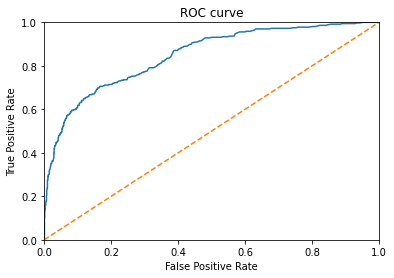

In [57]:
fpr, tpr, thresholds = roc_curve(target_valid_array, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

# < use the functions plt.xlim() and plt.ylim() to
#   set the boundary for the axes from 0 to 1 >
plt.xlim([0, 1])
plt.ylim([0, 1])
# < use the functions plt.xlabel() and plt.ylabel() to
#   name the axes "False Positive Rate" and "True Positive Rate" >
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# < add the heading "ROC curve" with the function plt.title() >
plt.title("ROC curve")
plt.show()

<div style="border:solid black 2px; padding: 20px"> <b>conclusion for f1 score without addressing the imbalance </b><br>
best for RandomForestClassifier: n_estimators = 600 , depth = 29. f1 score =0.576. Without addressing the imbalance, the model can't reach the desired F1 score and stagnate at ~0.55. and it is very slow. The imbalance:There are 4 times less Exites=1 then Exited=0

## Improve_the_quality <a class="anchor" id="Improve_the_quality"></a>

* Make sure you use at least two approaches to fixing class imbalance. 
* Use the training set to pick the best parameters. 
* Train different models on training and validation sets. 
* Find the best one.

In [58]:
for i in range(190, 300, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=i,max_depth=29)
    # < train the model with training data set>
    model.fit(features_train_scaled, target_train_array)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('n_estimators:',i,',',f1_score(target_valid_array, predictions_valid)) 

n_estimators: 190 , 0.5656565656565657
n_estimators: 200 , 0.5617597292724196
n_estimators: 210 , 0.5651438240270727
n_estimators: 220 , 0.5757575757575757
n_estimators: 230 , 0.5752961082910321
n_estimators: 240 , 0.5762144053601341
n_estimators: 250 , 0.5762144053601341
n_estimators: 260 , 0.574750830564784
n_estimators: 270 , 0.5709515859766277
n_estimators: 280 , 0.5728643216080401
n_estimators: 290 , 0.5762144053601341


In [59]:
#first, I'll use class_weight='balanced'
for depth in range(1, 20, 1):
    model = RandomForestClassifier(random_state=12345, n_estimators=20,max_depth=depth,class_weight='balanced')
    # < train the model with training data set>
    model.fit(features_train_scaled, target_train_array)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('depth:',depth,',',f1_score(target_valid_array, predictions_valid)) 

depth: 1 , 0.4814049586776859
depth: 2 , 0.5115257958287596
depth: 3 , 0.5399325084364454
depth: 4 , 0.5378704720087817
depth: 5 , 0.5665529010238908
depth: 6 , 0.5674418604651162
depth: 7 , 0.5785714285714286
depth: 8 , 0.5786163522012578
depth: 9 , 0.5833333333333334
depth: 10 , 0.5831062670299727
depth: 11 , 0.5839210155148096
depth: 12 , 0.5882352941176472
depth: 13 , 0.5842349304482226
depth: 14 , 0.5759493670886076
depth: 15 , 0.5561139028475712
depth: 16 , 0.5463743676222597
depth: 17 , 0.5376712328767124
depth: 18 , 0.5288966725043783
depth: 19 , 0.5432525951557095


In [60]:
for i in range(1, 20, 1):
    model = RandomForestClassifier(random_state=12345, n_estimators=i,max_depth=12,class_weight='balanced')
    # < train the model with training data set>
    model.fit(features_train_scaled, target_train_array)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('n_estimators:',i,',',f1_score(target_valid_array, predictions_valid)) 

n_estimators: 1 , 0.4684684684684685
n_estimators: 2 , 0.401263823064771
n_estimators: 3 , 0.5162162162162163
n_estimators: 4 , 0.5110782865583455
n_estimators: 5 , 0.5396383866481225
n_estimators: 6 , 0.5459940652818991
n_estimators: 7 , 0.5574712643678161
n_estimators: 8 , 0.552437223042836
n_estimators: 9 , 0.5483870967741935
n_estimators: 10 , 0.5667166416791605
n_estimators: 11 , 0.5620328849028401
n_estimators: 12 , 0.5701492537313433
n_estimators: 13 , 0.5782414307004471
n_estimators: 14 , 0.5824665676077266
n_estimators: 15 , 0.5812220566318926
n_estimators: 16 , 0.5837037037037037
n_estimators: 17 , 0.5887573964497042
n_estimators: 18 , 0.5833333333333334
n_estimators: 19 , 0.5865102639296187


In [61]:
for i in range(15, 100, 5):
    model = RandomForestClassifier(random_state=12345, n_estimators=i,max_depth=12,class_weight='balanced')
    # < train the model with training data set>
    model.fit(features_train_scaled, target_train_array)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('n_estimators:',i,',',f1_score(target_valid_array, predictions_valid)) 

n_estimators: 15 , 0.5812220566318926
n_estimators: 20 , 0.5882352941176472
n_estimators: 25 , 0.5816023738872403
n_estimators: 30 , 0.5882352941176471
n_estimators: 35 , 0.598473282442748
n_estimators: 40 , 0.5878787878787879
n_estimators: 45 , 0.5882352941176471
n_estimators: 50 , 0.5909090909090909
n_estimators: 55 , 0.5945945945945946
n_estimators: 60 , 0.5864661654135339
n_estimators: 65 , 0.5757575757575758
n_estimators: 70 , 0.5804511278195489
n_estimators: 75 , 0.5740181268882175
n_estimators: 80 , 0.5864661654135339
n_estimators: 85 , 0.5847076461769115
n_estimators: 90 , 0.5839636913767019
n_estimators: 95 , 0.582701062215478


In [99]:
model = RandomForestClassifier(random_state=12345, n_estimators=55,max_depth=12,class_weight='balanced')
# < train the model with training data set>
model.fit(features_train_scaled, target_train_array)
predictions_valid = model.predict(features_valid_scaled)
#validation of the data
print('f1 score for validation set:',f1_score(target_valid_array, predictions_valid)) 

f1 score for validation set: 0.5945945945945946


In [63]:
probabilities_valid = model.predict_proba(features_valid_scaled)

In [64]:
probabilities_one_valid = probabilities_valid[:, 1]

In [65]:
auc_roc= roc_auc_score(target_valid_array, probabilities_one_valid)
print('auc_roc score for downsampeling:',auc_roc)

auc_roc score for downsampeling: 0.8401932719723498


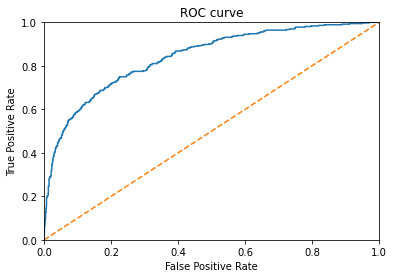

In [66]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

# < use the functions plt.xlim() and plt.ylim() to
#   set the boundary for the axes from 0 to 1 >
plt.xlim([0, 1])
plt.ylim([0, 1])
# < use the functions plt.xlabel() and plt.ylabel() to
#   name the axes "False Positive Rate" and "True Positive Rate" >
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# < add the heading "ROC curve" with the function plt.title() >
plt.title("ROC curve")
plt.show()

<div style="border:solid black 2px; padding: 20px"> <b>Note: </b><br>
Best balanced without down/upsampling for RandomForestClassifier: n_estimators = 55, depth = 12. f1 score =0.5988700564971751,  it is not good enough, we need to try with down/upsampling

### Upsampling <a class="anchor" id="Upsampling"></a>

In [67]:
#upsample() function
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled



In [68]:
#using the function on features_train, target_train to balance the 4 times difference
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 3
)

In [69]:
features_train_scaled_upsampled = scaler.fit_transform(features_upsampled)

In [70]:
target_train_array_upsampled = np.array(target_upsampled)

In [71]:
(target_train_array_upsampled == 0).sum()

4346

In [72]:
(target_train_array_upsampled == 1).sum()

3315

In [73]:
#training the model, iterating through depth
for depth in range(1, 20, 1):
    model = RandomForestClassifier(random_state=12345, n_estimators=12,max_depth=depth,class_weight='balanced')
    # < train the model with training data set>
    model.fit(features_train_scaled_upsampled, target_train_array_upsampled)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('depth:',depth,',',f1_score(target_valid_array, predictions_valid)) 

depth: 1 , 0.4751381215469613
depth: 2 , 0.503155996393147
depth: 3 , 0.5022831050228309
depth: 4 , 0.5386138613861386
depth: 5 , 0.5330739299610895
depth: 6 , 0.5445240532241556
depth: 7 , 0.5587301587301587
depth: 8 , 0.5560344827586207
depth: 9 , 0.549618320610687
depth: 10 , 0.5635103926096998
depth: 11 , 0.5700365408038977
depth: 12 , 0.5634146341463414
depth: 13 , 0.5608465608465608
depth: 14 , 0.5760000000000001
depth: 15 , 0.558904109589041
depth: 16 , 0.5780189959294437
depth: 17 , 0.5400843881856541
depth: 18 , 0.5763195435092725
depth: 19 , 0.5609065155807367


In [75]:
#training the model, iterating through n_estimatorswith depth 16
for i in range(10, 200, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=i,max_depth=16,class_weight='balanced')
    # < train the model with training data set>
    model.fit(features_train_scaled_upsampled, target_train_array_upsampled)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('n_estimators:',i,',',f1_score(target_valid_array, predictions_valid)) 

n_estimators: 10 , 0.5631067961165048
n_estimators: 20 , 0.5828729281767957
n_estimators: 30 , 0.5754189944134078
n_estimators: 40 , 0.5872576177285319
n_estimators: 50 , 0.599721059972106
n_estimators: 60 , 0.5880721220527045
n_estimators: 70 , 0.5936199722607489
n_estimators: 80 , 0.5872576177285319
n_estimators: 90 , 0.5939226519337018
n_estimators: 100 , 0.5930069930069931
n_estimators: 110 , 0.5963938973647711
n_estimators: 120 , 0.6033519553072626
n_estimators: 130 , 0.600558659217877
n_estimators: 140 , 0.6008344923504868
n_estimators: 150 , 0.602510460251046
n_estimators: 160 , 0.6044568245125348
n_estimators: 170 , 0.5958041958041957
n_estimators: 180 , 0.5941422594142259
n_estimators: 190 , 0.5955678670360111


In [76]:
#training the model, iterating through n_estimators
for depth in range(16, 30, 1):
    model = RandomForestClassifier(random_state=12345, n_estimators=160,max_depth=depth,class_weight='balanced')
    # < train the model with training data set>
    model.fit(features_train_scaled_upsampled, target_train_array_upsampled)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('depth:',depth,',',f1_score(target_valid_array, predictions_valid)) 

depth: 16 , 0.6044568245125348
depth: 17 , 0.5966386554621849
depth: 18 , 0.596045197740113
depth: 19 , 0.599713055954089
depth: 20 , 0.6031294452347085
depth: 21 , 0.5991440798858773
depth: 22 , 0.6068376068376069
depth: 23 , 0.5897435897435898
depth: 24 , 0.6002844950213371
depth: 25 , 0.5932203389830508
depth: 26 , 0.5991561181434599
depth: 27 , 0.5952045133991538
depth: 28 , 0.5971830985915494
depth: 29 , 0.5971830985915494


In [101]:
model = RandomForestClassifier(random_state=12345, n_estimators=160,max_depth=16,class_weight='balanced')
# < train the model with training data set>
model.fit(features_train_scaled_upsampled, target_train_array_upsampled)
predictions_valid = model.predict(features_valid_scaled)
#validation of the data
print('f1 score for validation set:',f1_score(target_valid_array, predictions_valid)) 

f1 score for validation set: 0.6044568245125348


#### Auc Roc for model with upsampeling

In [78]:
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc= roc_auc_score(target_valid_array, probabilities_one_valid)
print('auc_roc score for upsampeling:', auc_roc)

auc_roc score for upsampeling: 0.8422712009257087


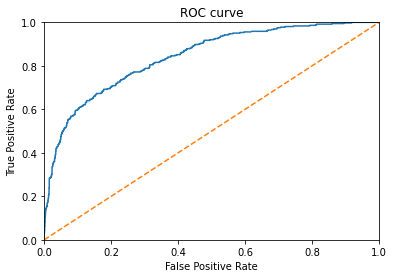

In [79]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

# < use the functions plt.xlim() and plt.ylim() to
#   set the boundary for the axes from 0 to 1 >
plt.xlim([0, 1])
plt.ylim([0, 1])
# < use the functions plt.xlabel() and plt.ylabel() to
#   name the axes "False Positive Rate" and "True Positive Rate" >
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# < add the heading "ROC curve" with the function plt.title() >
plt.title("ROC curve")
plt.show()

<div style="border:solid black 2px; padding: 20px"> <b>Findings upsampling: </b><br>
Best for upsampling with RandomForestClassifier: n_estimators = 160, depth = 16. f1 score =0.60431654676259.Aoc Roc score of ~0.83, meaning the model has high quality.

### Downsampeling <a class="anchor" id="Downsampeling"></a>

In [80]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

In [81]:
#using the function on features_train, target_train to balance the 4 times difference
features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.5
)

In [82]:
features_train_scaled_downsampled = scaler.fit_transform(features_downsampled)

In [83]:
target_train_array_downsampled = np.array(target_downsampled)

In [84]:
(target_train_array_downsampled == 0).sum()

2173

In [85]:
(target_train_array_downsampled == 1).sum()

1105

In [86]:
#training the model, iterating through depth
for depth in range(1, 20, 1):
    model = RandomForestClassifier(random_state=12345, n_estimators=50,max_depth=depth,class_weight='balanced')
    # < train the model with training data set>
    model.fit(features_train_scaled_downsampled, target_train_array_downsampled)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('depth:',depth,',',f1_score(target_valid_array, predictions_valid)) 

depth: 1 , 0.47926267281106
depth: 2 , 0.5176695319961795
depth: 3 , 0.5406504065040649
depth: 4 , 0.5445344129554657
depth: 5 , 0.5617486338797815
depth: 6 , 0.5633187772925765
depth: 7 , 0.5691788526434196
depth: 8 , 0.5747126436781609
depth: 9 , 0.574095682613769
depth: 10 , 0.5738295318127251
depth: 11 , 0.5855513307984792
depth: 12 , 0.587641866330391
depth: 13 , 0.5859375
depth: 14 , 0.5896414342629481
depth: 15 , 0.5957446808510639
depth: 16 , 0.5976095617529881
depth: 17 , 0.5860215053763441
depth: 18 , 0.5994550408719346
depth: 19 , 0.5876010781671158


In [87]:
#training the model, iterating through n_estimatorswith depth = 16

for i in range(10, 200, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=i,max_depth=16,class_weight='balanced')
    # < train the model with training data set>
    model.fit(features_train_scaled_downsampled, target_train_array_downsampled)
    predictions_valid = model.predict(features_valid_scaled)
    #validation of the data
    print('n_estimators:',i,',',f1_score(target_valid_array, predictions_valid)) 

n_estimators: 10 , 0.5917808219178082
n_estimators: 20 , 0.5932885906040267
n_estimators: 30 , 0.6104417670682731
n_estimators: 40 , 0.6063829787234042
n_estimators: 50 , 0.5976095617529881
n_estimators: 60 , 0.5992010652463382
n_estimators: 70 , 0.6047745358090185
n_estimators: 80 , 0.5928853754940713
n_estimators: 90 , 0.5973333333333334
n_estimators: 100 , 0.6013422818791946
n_estimators: 110 , 0.6034712950600801
n_estimators: 120 , 0.6032171581769438
n_estimators: 130 , 0.5978552278820375
n_estimators: 140 , 0.6002691790040378
n_estimators: 150 , 0.6013422818791946
n_estimators: 160 , 0.6021505376344085
n_estimators: 170 , 0.6000000000000001
n_estimators: 180 , 0.5964912280701754
n_estimators: 190 , 0.601078167115903


In [88]:
model = RandomForestClassifier(random_state=12345, n_estimators=30,max_depth=16,class_weight='balanced')
# < train the model with training data set>
model.fit(features_train_scaled_downsampled, target_train_array_downsampled)
predictions_valid = model.predict(features_valid_scaled)
#validation of the data
print('f1 score for validation set:',f1_score(target_valid_array, predictions_valid)) 

f1 score for validation set: 0.6104417670682731


#### Auc Roc for model with downsampeling

In [89]:
probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc= roc_auc_score(target_valid_array, probabilities_one_valid)
print('auc_roc score for downsampeling:',auc_roc)

auc_roc score for downsampeling: 0.8373325745142677


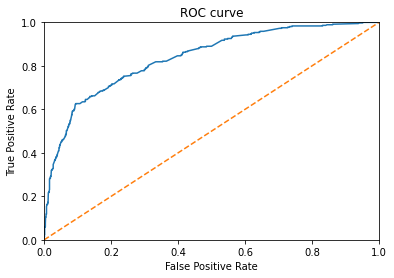

In [90]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')

# < use the functions plt.xlim() and plt.ylim() to
#   set the boundary for the axes from 0 to 1 >
plt.xlim([0, 1])
plt.ylim([0, 1])
# < use the functions plt.xlabel() and plt.ylabel() to
#   name the axes "False Positive Rate" and "True Positive Rate" >
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# < add the heading "ROC curve" with the function plt.title() >
plt.title("ROC curve")
plt.show()

<div style="border:solid black 2px; padding: 20px"> <b>Findings upsampling: </b><br>
Best for downsampling with RandomForestClassifier: n_estimators = 30, depth = 16. f1 score = 0.6073871409028728.Aoc Roc score of ~0.83, meaning the model has high quality.

### Test <a class="anchor" id="test"></a>

##### f1 score without addressing the imbalance

In [105]:
model = RandomForestClassifier(random_state=12345, n_estimators = 600 , max_depth = 29.)
# < train the model with training data set>
model.fit(features_train_scaled, target_train_array)
predictions_valid = model.predict(features_valid_scaled)
#validation of the data
print('f1 score test set:',f1_score(target_valid_array, predictions_valid))


f1 score test set: 0.5675675675675675


##### test the modle with class_weight='balanced' only on the test set

In [113]:
model = RandomForestClassifier(random_state=12345, n_estimators=55,max_depth=12,class_weight='balanced')
# < train the model with training data set>
model.fit(features_train_scaled, target_train_array)
predictions_test = model.predict(features_test_scaled)
#validation of the data
print('f1 score test set:',f1_score(target_test_array, predictions_test)) 

f1 score test set: 0.6124137931034483


##### test the modle with upsampling on the test set

In [114]:
model = RandomForestClassifier(random_state=12345, n_estimators=160,max_depth=16,class_weight='balanced')
# < train the model with training data set>
model.fit(features_train_scaled_upsampled, target_train_array_upsampled)
predictions_test = model.predict(features_test_scaled)
#validation of the data
print('f1 score test set:',f1_score(target_test_array, predictions_test)) 

f1 score test set: 0.6211340206185567


##### test the modle with downsamling on the test set

In [115]:
model = RandomForestClassifier(random_state=12345, n_estimators=30,max_depth=16,class_weight='balanced')
# < train the model with training data set>
model.fit(features_train_scaled_downsampled, target_train_array_downsampled)
predictions_test = model.predict(features_test_scaled)
#validation of the data
print('f1 score for validation set:',f1_score(target_test_array, predictions_test))

f1 score for validation set: 0.6027060270602707


## Conclusion <a class="anchor" id="conclusion"></a>

The data needed to be changed in order to use in a regression model. There were outliers like 84 years old bank customers, or the missing data in the tenure feature, that needed to be dropped. in all, there are not many differences between models except the CPU usage. the best model in this perspective is the "class_weight='balanced' only". However, the upsample model has the best f1 score. in conclusion, we need to decide what is more important, a fast model or a higher quality model. If it is quality I'll choose the upsampling and maybe try to adjust the upsampling and the model, if it is CPU, then with class_weight='balanced' only model I did is the best one.  